Ch3, Q15

This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.


Boston Housing dataset:

CRIM: Per capita crime rate by town.

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.

INDUS: Proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

NOX: Nitrogen oxides concentration (parts per 10 million).

RM: Average number of rooms per dwelling.

AGE: Proportion of owner-occupied units built prior to 1940.

DIS: Weighted distances to five Boston employment centers.

RAD: Index of accessibility to radial highways.

TAX: Full-value property tax rate per $10,000.

PTRATIO: Pupil-teacher ratio by town.

B: $1000(B_k - 0.63)^2$ where Bk is the proportion of Black residents by town.

LSTAT: Percentage of lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.

(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

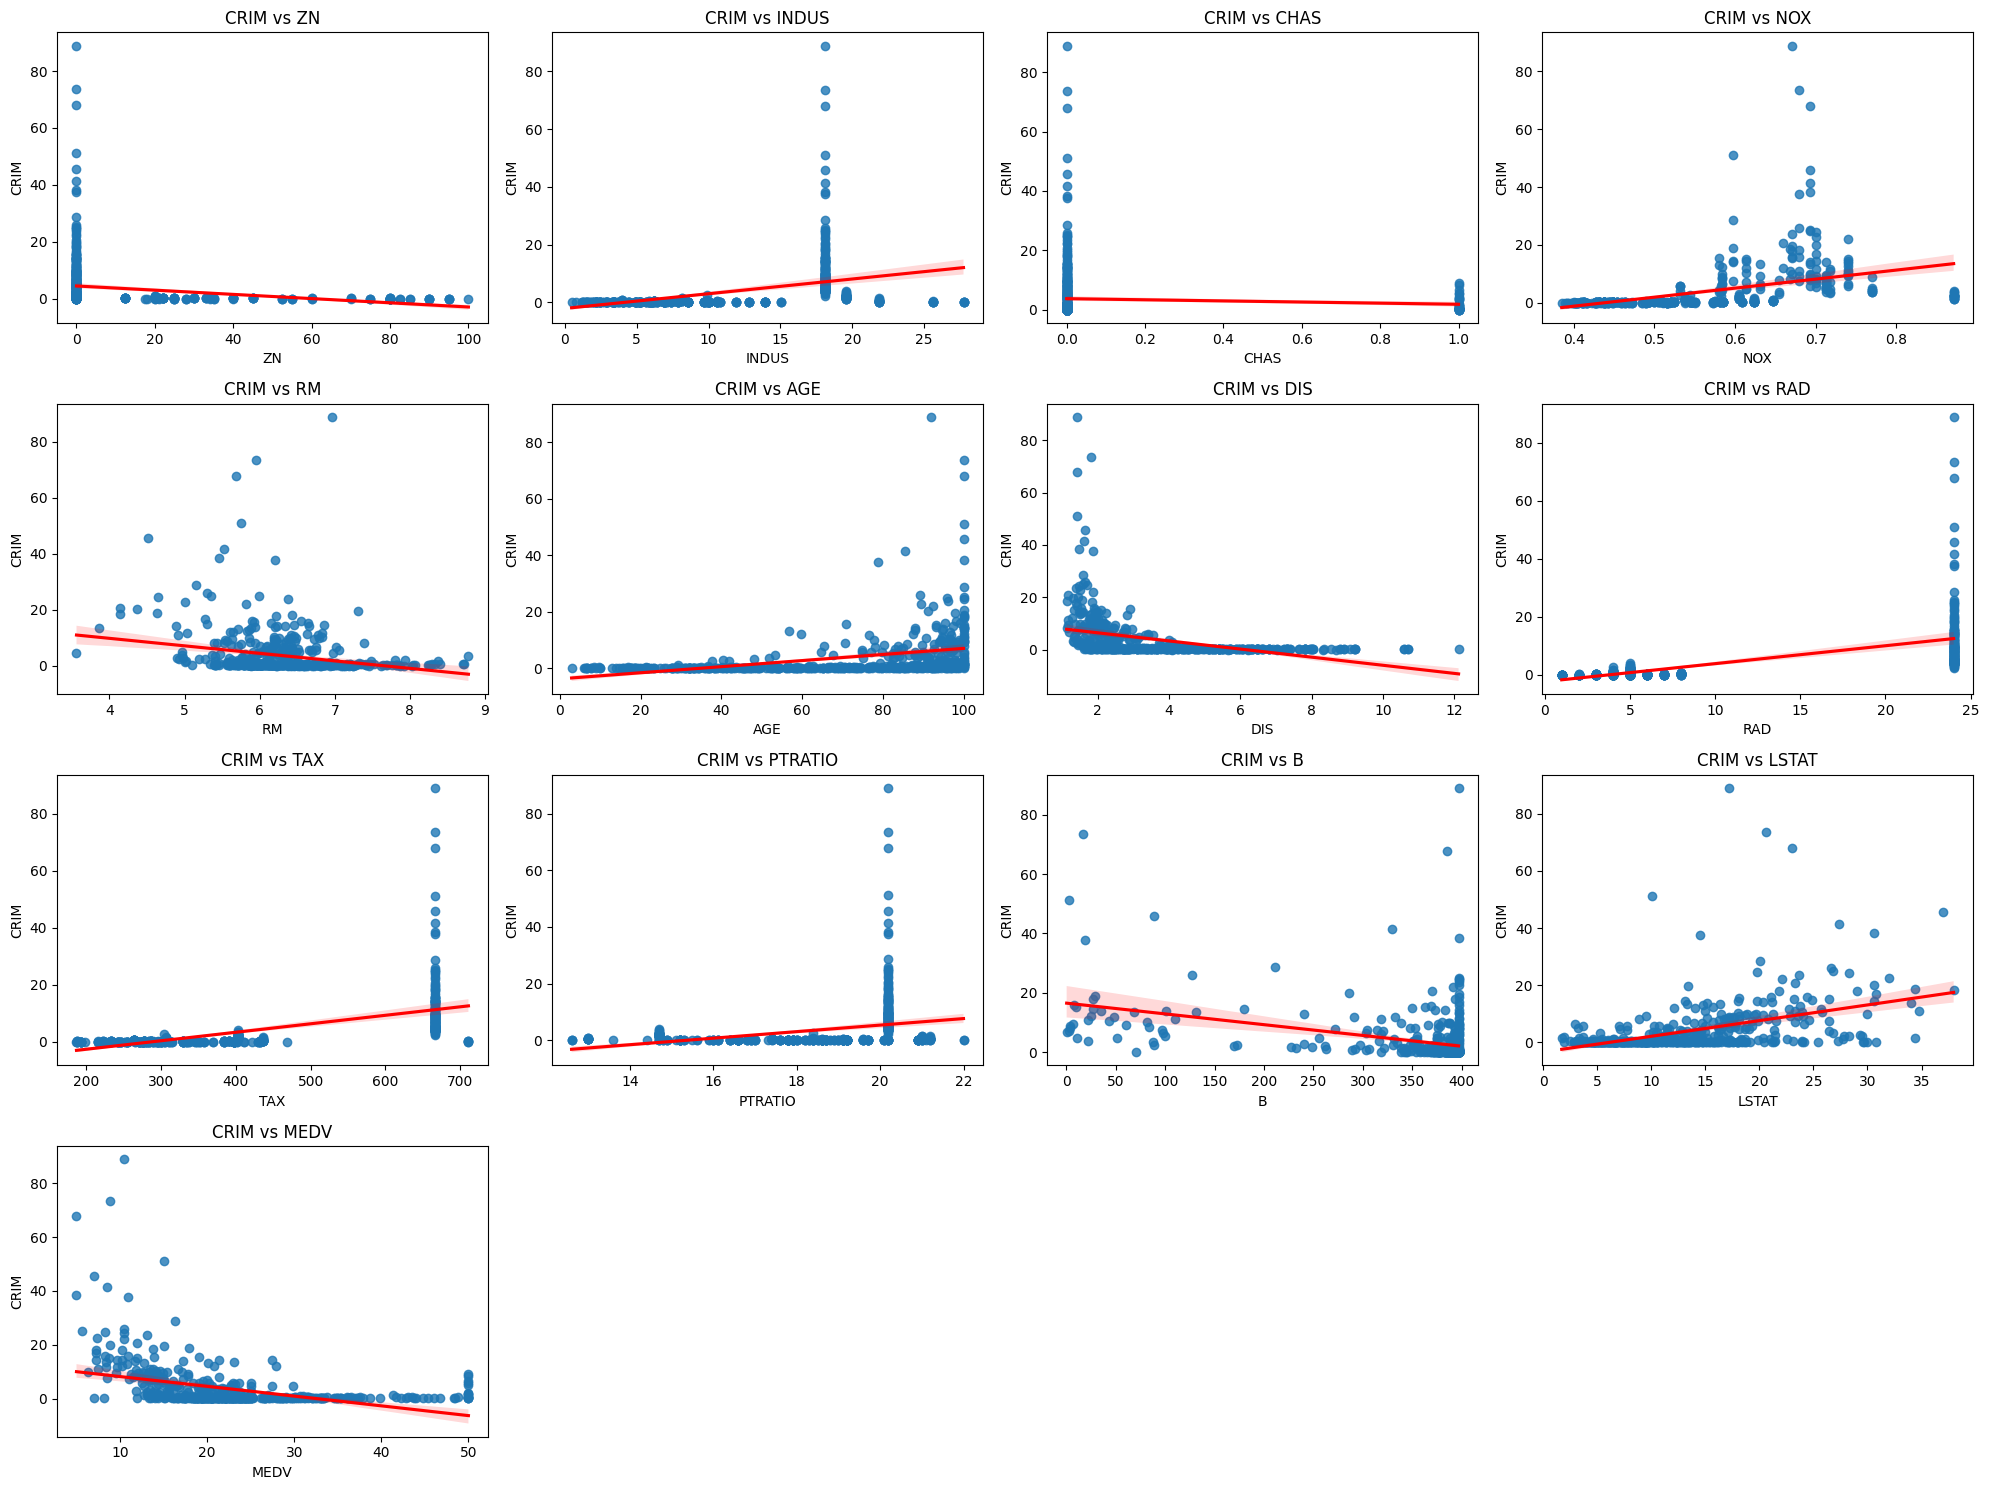

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset from the UCI machine learning repository
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)

# Process the raw data
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])  # Combine rows
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data, columns=columns)

# Plot settings
num_predictors = len(df.columns[1:])  # Number of predictors
rows = 4  # Define number of rows
cols = 4  # Define number of columns

# Create a figure and axes with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust the figure size accordingly
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each predictor and create the plot
for i, predictor in enumerate(df.columns[1:]):  # Exclude 'CRIM' (response variable)
    sns.regplot(x=predictor, y='CRIM', data=df, ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'CRIM vs {predictor}')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('CRIM')

# Remove any empty subplots (if there are fewer predictors than rows*cols)
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In this analysis, fit simple linear regression models for each predictor in the Boston dataset to predict the per capita crime rate (CRIM). The scatter plots with red regression lines show varying relationships:

Positive Relationships: Predictors like AGE and NOX show a positive correlation with CRIM, meaning higher values are associated with higher crime rates.

Negative Relationships: Predictors like RM and DIS exhibit negative correlations, suggesting that higher values are linked to lower crime rates.

(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : $\beta_j$ = 0?

In [3]:
import statsmodels.api as sm

# Define the response variable (CRIM) and predictor variables (all other variables)
X = df.drop(columns=['CRIM'])  # Exclude 'CRIM' from the predictors
y = df['CRIM']                 # Response variable is 'CRIM'

# Add a constant term to the predictors to include an intercept in the model
X_const = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X_const).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.57e-56
Time:                        10:55:53   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

Predictors for Which We Reject the Null Hypothesis $$ H_0: \beta_j = 0 $$

We reject the null hypothesis for the following predictors because their p-values are less than 0.05. These predictors have a significant effect on the response variable CRIM (per capita crime rate):

ZN (Proportion of residential land zoned for large lots) → p-value = 0.017

DIS (Weighted distances to Boston employment centers) → p-value = 0.001

RAD (Accessibility to radial highways) → p-value = 0.000

B (Proportion of Black residents in the town) → p-value = 0.041

MEDV (Median value of owner-occupied homes) → p-value = 0.001


(c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

<ipython-input-2-09b2f577b201>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.append(model.params[1])  # Store the coefficient for the predictor
<ipython-input-2-09b2f577b201>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.append(model.params[1])  # Store the coefficient for the predictor
<ipython-input-2-09b2f577b201>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coefs.append(m

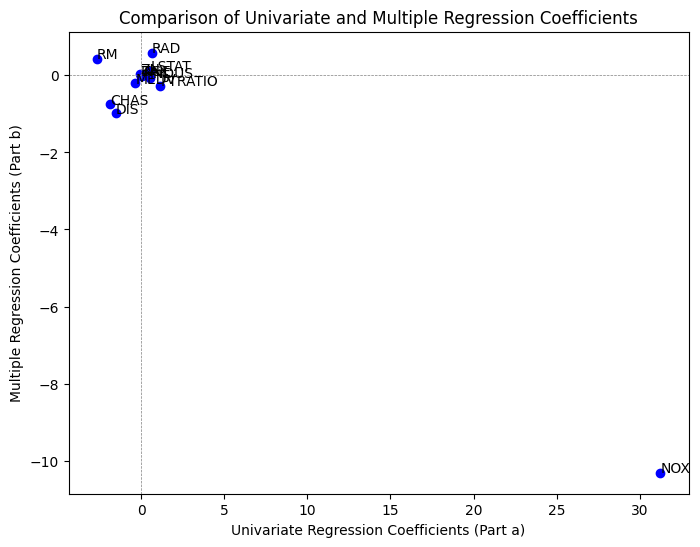

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset from the UCI machine learning repository
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)

# Process the raw data
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])  # Combine rows
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data, columns=columns)

# Step 1: Fit univariate (simple) regression models and collect the coefficients
univariate_coefs = []

# Loop through each predictor, excluding 'CRIM' (the response variable)
for predictor in df.columns[1:]:  # Skip the response variable 'CRIM'
    X = df[[predictor]]
    y = df['CRIM']
    X_const = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X_const).fit()
    univariate_coefs.append(model.params[1])  # Store the coefficient for the predictor

# Step 2: Fit the multiple regression model
X = df.drop(columns=['CRIM'])  # All columns except 'CRIM'
y = df['CRIM']                 # Response variable is 'CRIM'

# Add a constant to the predictors for the intercept
X_const = sm.add_constant(X)

# Fit the multiple regression model
multiple_model = sm.OLS(y, X_const).fit()

# Extract coefficients from the multiple regression model (skip the intercept)
multiple_coefs = multiple_model.params[1:]

# Step 3: Plot univariate vs multiple regression coefficients
plt.figure(figsize=(8, 6))
plt.scatter(univariate_coefs, multiple_coefs, color='blue')

# Add labels and title
plt.xlabel('Univariate Regression Coefficients (Part a)')
plt.ylabel('Multiple Regression Coefficients (Part b)')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')

# Add labels to each point for clarity
for i, predictor in enumerate(df.columns[1:]):  # Skipping 'CRIM'
    plt.text(univariate_coefs[i], multiple_coefs[i], predictor)

# Display the plot
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form $$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon $$


In [3]:
import statsmodels.api as sm

# Function to fit the polynomial model for a predictor
def fit_polynomial_regression(predictor):
    # Create the polynomial terms: X, X^2, X^3
    X = df[[predictor]]
    X['X^2'] = X[predictor] ** 2
    X['X^3'] = X[predictor] ** 3
    y = df['CRIM']

    # Add a constant (intercept term)
    X_const = sm.add_constant(X)

    # Fit the polynomial regression model
    model = sm.OLS(y, X_const).fit()

    return model

# Store the results
polynomial_results = {}

# Loop through each predictor and fit the polynomial regression
for predictor in df.columns[1:]:  # Exclude 'CRIM' (response variable)
    model = fit_polynomial_regression(predictor)
    polynomial_results[predictor] = model
    # Display the summary of the model for each predictor
    print(f"Polynomial Regression for {predictor}")
    print(model.summary())
    print("\n")


<ipython-input-3-6512fd306231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X^2'] = X[predictor] ** 2
<ipython-input-3-6512fd306231>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X^3'] = X[predictor] ** 3
<ipython-input-3-6512fd306231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Polynomial Regression for ZN
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.28e-06
Time:                        14:18:43   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461  

<ipython-input-3-6512fd306231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X^2'] = X[predictor] ** 2
<ipython-input-3-6512fd306231>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X^3'] = X[predictor] ** 3
<ipython-input-3-6512fd306231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.45e-59
Time:                        14:18:43   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1655      3.356     15.840      0.0

Evidence of Non-linear Association: The predictors ZN, NOX, DIS, B, and LSTAT show evidence of non-linear association with CRIM, as their quadratic or cubic terms are statistically significant.

No Evidence of Non-linearity: Predictors like INDUS, CHAS, RM, AGE, RAD, TAX, PTRATIO, and MEDV do not show any evidence of a non-linear relationship with CRIM.